In [1]:
import os
import pickle
import numpy as np

from algos import *
from infect import infect
from sbm import SBM

In [2]:
def create_communities(s, N, M):
    size = round(N/M)
    communities = []

    for i in range(M):
        if(i == M-1):
            comm = s[i*size:]
        else:
            comm = s[i*size:(i+1)*(size)]
        communities.append(comm)

    return communities

In [3]:
N = 23
M = 5
s = [0,0,0,1,  0,1,1,1,  0,1,0,0,  0,1,1,0,  0,1,0,0,  0, 1, 0]

c =create_communities(s, N, M)
print(c)

[[0, 0, 0, 1, 0], [1, 1, 1, 0, 1], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 1, 0]]


In [3]:
def create_communities(s, N, M):
    size = round(N/M)
    communities = []

    for i in range(M):
        if(i == M-1):
            comm = s[i*size:]
        else:
            comm = s[i*size:(i+1)*(size)]
        communities.append(comm)

    return communities

# def Q1_commaware(communities):
#     tests = 0
#     max_stages = 0

#     party = []

#     for cult in communities:
#         tests += 1
#         if (num_infected(cult) != 0):
#             for i in cult:
#                 party.append(i)

#     tests, max_stages = Qtesting1(party)

#     return tests, max_stages

def Q1_commaware(communities):
    tests = 0
    max_stages = 0
    for cult in communities:
        if (num_infected(cult) >  len(cult)/2):
            #print("Running tests on ", cult)
            t, st = Qtesting1(cult)
            tests += t
            max_stages = max(st, max_stages)
        elif(num_infected(cult) != 0):
            t, st = diag_splitting(cult)
            tests += t
            max_stages = max(st, max_stages)
    return tests, max_stages+1

In [54]:
N = 30
M = 5
q0 = .4
q1 = 0

p0 = .1
p1 = .5
time_steps = 2

G = SBM(N, M, q0,q1)

s = infect(G, p0, p1, time_steps)
comms = create_communities(s, N, M)
for c in range(len(comms)):
    print("Community ", c, " -- ", comms[c])

Q1_commaware(comms)

Original infected individuals:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Infected individuals after step  0  -  [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Infected individuals after step  1  -  [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Community  0  --  [0. 0. 0. 0. 0. 0.]
Community  1  --  [1. 1. 0. 1. 0. 1.]
Community  2  --  [1. 1. 0. 1. 0. 1.]
Community  3  --  [0. 0. 0. 0. 0. 0.]
Community  4  --  [0. 0. 0. 0. 0. 0.]
Big Party:  [1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0]
Total tests:  25 	Total stages:  5


(25, 5)

In [4]:
def iter(N,M,q0,q1,p0,p1,time_steps,num_sims,method,dataset='sbm'):

    name = dataset+'N'+str(N)+'_M'+str(M)+'_SIM'+str(num_sims)+'_step'+str(time_steps)+'_q0'+str(q0)+'_q1'+str(q1)+'_p0'+str(p0)+'_p1'+str(p1)+method+'graphs.pkl'
    if not os.path.isfile(name):
        print('Generating synthetic dataset!')
        Gs = np.zeros((num_sims,N,N))
        Communities = dict()
        data = dict()
        Individuals = dict()
        if dataset=='sbm':
            for i in range(num_sims):
                Gs[i] = SBM(N,M,q0,q1)
                ###################################################
                '''your code here'''
                Individuals[i] = infect(Gs[i],p0,p1,time_steps)
                s = Individuals[i]
                Communities[i] = create_communities(s, N,M)
        elif dataset=='iid':
            for i in range(num_sims):
                ###################################################
                '''your code here'''
                individuals = np.random.choice([0, 1], size=N, p=[1 - p0, p0])
                Individuals[i] = individuals
                s = Individuals[i]
                print(s)
                Communities[i] = create_communities(s, N,M)
                print(Communities[i])
                ###################################################
        data['graph'] = Gs
        data['communities'] = Communities
        data['individuals'] = Individuals
        with open(name, 'wb') as infile:
            pickle.dump(data,infile) 
    #         print('Dataset done!')


    ###################################################
    '''your code for initialization parameters if needed''' 
    fraction_ppl = 0
    fraction_family = 0
    fraction_ppl_in_family = 0
    num_tests = 0
    num_stages = 0
    ###################################################
        
    if os.path.isfile(name):
        with open(name, 'rb') as infile:
            data = pickle.load(infile) 
        print('Data loaded!')
    for i in range(num_sims): 
        '''
        if dataset=='synthetic':
            G = data['graph'][i]
            communities = data['communities'][i]
            individuals = data['individuals'][i]
        '''
        ###################################################
        '''your code to calculate the statistics here''' 
        if(method == "binary"):
            G = data['graph']
            communities = data['communities'][i]
            individuals = data['individuals'][i]
            numtests_bs, num_stages_bs, _ = binary_splitting(individuals)
            num_tests += numtests_bs
            num_stages += num_stages_bs
        elif(method == "Q1"):
            G = data['graph']
            communities = data['communities'][i]
            individuals = data['individuals'][i]
            numtests_q1, num_stages_q1 = Qtesting1(individuals)
            num_tests += numtests_q1
            num_stages += num_stages_q1
        elif(method == "Q2"):
            G = data['graph']
            communities = data['communities'][i]
            individuals = data['individuals'][i]
            numtests_q2, num_stages_q2 = Qtesting2(individuals)
            num_tests += numtests_q2
            num_stages += num_stages_q2
        elif(method == "diag"):
            G = data['graph']
            communities = data['communities'][i]
            individuals = data['individuals'][i]
            numtests_diag, num_stages_diag = diag_splitting(individuals)
            num_tests += numtests_diag
            num_stages += num_stages_diag
        elif(method == "comm1"):
            G = data['graph']
            communities = data['communities'][i]
            individuals = data['individuals'][i]
            numtests_diag, num_stages_diag = Q1_commaware(communities)
            num_tests += numtests_diag
            num_stages += num_stages_diag

        #elif(method == "Q1_C"):

        #elif(method == "Q2_C"):
        
        ###################################################

        # interleave the individuals
        #s = Individuals.copy()
        #np.random.shuffle(s)
        # binary
       # numtests_bs, num_stages_bs, _ = binary_splitting(s)
        '''
        # algorithm 1
        numtests_q1, num_stages_q1 = Qtesting1(s)
        # algorithm 2
        numtests_q2, num_stages_q2 = Qtesting2(s)
        # community-aware
        numtests_q1_c, num_stages_q1_c = Qtesting1_comm_aware(Individuals.copy(),communities)
        # community-aware
        numtests_q2_c, num_stages_q2_c = Qtesting2_comm_aware(Individuals.copy(),communities)
        '''

    ###################################################
    '''your code to calculate the statistics here''' 
    '''Do not forget to take the average'''
    num_tests /= num_sims
    num_stages /= num_sims

    ###################################################
            

    return fraction_ppl, fraction_family, fraction_ppl_in_family, num_tests, num_stages
        

<div class="alert alert-warning">
<b>Task 1 </b> 
Plot how the fraction of infected people, the percentage of infected communities, and the average percentage of infected people in each community change with the each setting for the synthetic dataset described in the following table and comment on the results. Average over at least $100$ SBM network realization.     

</div>

| N | M | q0, q1 | p0 | p1 |time steps  |
|---|---|--------|----|----|------------|
|256| 16| (1,0)  |0.001|[0.05:1]|2|
|   | 16|(0.9, 0.1)  | 0.001| [0.05:1]|2     |
|   | 16 |(0.5, 0.2)  | 0.001| [0.05:1]|2     |

In [5]:
import matplotlib.pyplot as plt

def plot_results(N, M, q0, q1, p1, time_steps, num_sims, method, method2, method3, method4,method5, method6, p_values):
    num_tests_list = []
    num_stages_list = []

    num_tests_list2 = []
    num_stages_list2 = []

    num_tests_list3 = []
    num_stages_list3 = []  

    num_tests_list4 = []
    num_stages_list4 = []

    num_tests_comm1 = []
    num_stages_comm1 = []

    num_tests_comm2 = []
    num_stages_comm2 = []  
    for p0 in p_values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method, dataset='sbm')
        num_tests_list.append(num_tests)
        num_stages_list.append(num_stages)

    for p0 in p_values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method2, dataset='sbm')
        num_tests_list2.append(num_tests)
        num_stages_list2.append(num_stages)

    for p0 in p_values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method3, dataset='sbm')
        num_tests_list3.append(num_tests)
        num_stages_list3.append(num_stages)     

    for p0 in p_values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method4, dataset='sbm')
        num_tests_list4.append(num_tests)
        num_stages_list4.append(num_stages) 

    # Community testing 1
    for p0 in p_values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method5, dataset='sbm')
        num_tests_comm1.append(num_tests)
        num_stages_comm1.append(num_stages)      
    plt.figure(figsize=(18, 8))
    
    # Plot for number of tests
    plt.subplot(1, 2, 1)
    plt.plot(p_values, num_tests_list, marker='o', label=method)
    plt.plot(p_values, num_tests_list2, marker='x', label=method2)
    plt.plot(p_values, num_tests_list3, marker='^', label=method3)
    plt.plot(p_values, num_tests_list4, marker='^', label=method4)
    plt.plot(p_values, num_tests_comm1, marker='p', label=method5)
    plt.title('Number of Tests vs p0')
    plt.xlabel('p0')
    plt.ylabel('Number of Tests')
    plt.legend()
    
    # Plot for number of stages
    plt.subplot(1, 2, 2)
    plt.plot(p_values, num_stages_list, marker='o', label=method)
    plt.plot(p_values, num_stages_list2, marker='x', label=method2)
    plt.plot(p_values, num_stages_list3, marker='^', label=method3)
    plt.plot(p_values, num_stages_list4, marker='^', label=method4)
    plt.plot(p_values, num_stages_comm1, marker='p', label=method5)
    plt.title('Number of Stages vs p0')
    plt.xlabel('p0')
    plt.ylabel('Number of Stages')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [6]:
def num_infected(s):
    inf_people = 0
    for i in range(len(s)):
        inf_people += s[i]
    return inf_people


def mona(s, max_stages):
    inf_people = num_infected(s)
    #print("\nTESTING group: ", s)
  

    if (inf_people  == 1):
        binary_tests, binary_stages = diag_splitting(s)
        #print("--Num binary tests: ", binary_tests)
        #print("--Num binary stages: ", binary_stages)
        return 1 + binary_tests, 1 + binary_stages
    elif(inf_people < 1):
        #print("0 infected --> ran only 1 test")
        return 1, 1
    else:
        num_per_group = round(len(s)/inf_people)
        
        # for each subgroup, call function again
        tests = 1 # = this testing group
        for i in range(int(inf_people)):
            stages = 1
            if(i == inf_people-1):
                subGroup = s[i*num_per_group:]
            else:
                subGroup = s[i*num_per_group:(i+1)*(num_per_group)]
            
            t, st = mona(subGroup, max_stages)
            stages += st
            tests += t   # number of tests in subtree

            #print("Setting stages to ", max(max_stages, stages))
            max_stages = max(max_stages, stages)
        return tests, max_stages  

def Qtesting1(s):
    '''
    s(np.array): binary string of infection status
    '''
    num_tests = 0
    stages = 0
    ###################################################
    '''your code here'''
    #print("RUNNING TEST ON original: ", s, "\n")
    num_tests, stages = mona(s, stages)
    print("Total tests: ", num_tests, "\tTotal stages: ", stages)

    ###################################################

    return num_tests, stages



def pablo(s, max_stages):
    inf_range = num_infected2(s)
    #print("\nTESTING group: ", s)
  
    if (inf_range == 0):
        #print("0 infected --> ran only 1 test")
        return 1, 1
    elif (inf_range  == 1):
        # Only 1 infected person
        if len(s) == 1:
            return 1,1
        else:
            binary_tests, binary_stages = diag_splitting(s)
            #print("--Num binary tests: ", binary_tests)
            #print("--Num binary stages: ", binary_stages)
            return 1 + binary_tests, 1 + binary_stages
   
    inf_people = 0
    if (inf_range == 2):
        inf_people = 3
    elif (inf_range == 3):
        inf_people = 7
    else:
        inf_people = 8

    num_per_group = round(len(s)/inf_people)
        
        # for each subgroup, call function again
    tests = 1 # = this testing group
    for i in range(inf_people):
        stages = 1
        if(i == inf_people-1):
            subGroup = s[i*num_per_group:]
        else:
            subGroup = s[i*num_per_group:(i+1)*(num_per_group)]
            
        t, st = pablo(subGroup, max_stages)
        stages += st
        tests += t   # number of tests in subtree

        # delete:
        m = max(max_stages, stages)
       # if (m == stages and m != max_stages):
        #    print("Updating max stages from ", max_stages, " to ", stages)

        max_stages = max(max_stages, stages)
    return tests, max_stages


def Qtesting2(s):
    '''
    s(np.array): binary string of infection status
    '''
    num_tests = 0
    stages = 0
    ###################################################
    '''your code here'''
    #print("RUNNING TEST ON original: ", s, "\n")
    num_tests, stages = pablo(s, stages)
    print("Total tests: ", num_tests, "\tTotal stages: ", stages)
    ###################################################

    return num_tests,stages


In [6]:
def plot_infect(N, M, q0, q1, p1, time_steps, num_sims, method, values):
    frac_infected_list = []
    frac_infected_communities = []
    frac_infected_inCommunity = []

    for p0 in values:
        frac_infected, frac_communities, frac_inCommunity, _, _ = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method, dataset='iid')
        frac_infected_list.append(frac_infected)
        frac_infected_communities.append(frac_communities)
        frac_infected_inCommunity.append(frac_inCommunity)

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!


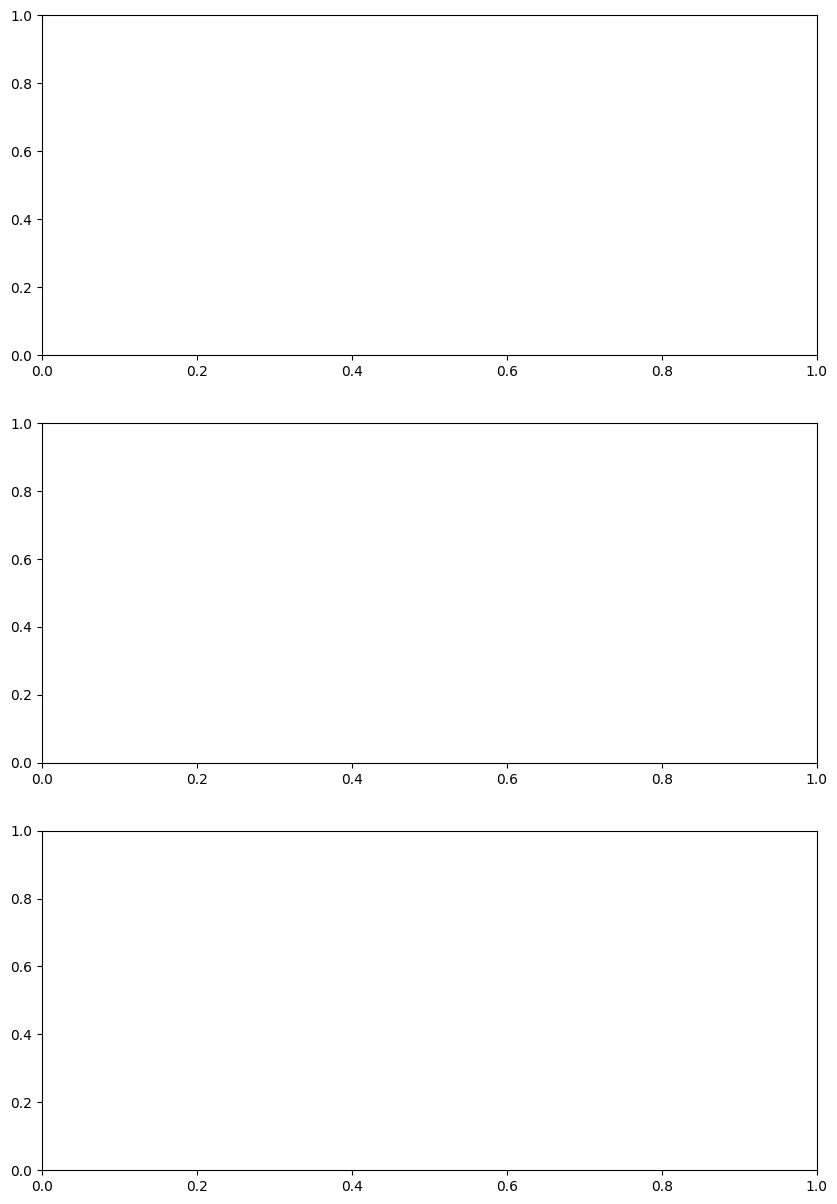

In [22]:
N = 100
M = 10
q0 = 1
q1 = 0
p1 = 0.001
time_steps = 2
num_sims = 20
method = 'infect'

p1_values = np.linspace(0.01, 0.5, 10)
plot_infect(N, M, q0, q1, p1, time_steps, num_sims, method, p1_values)

Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!
Data loaded!


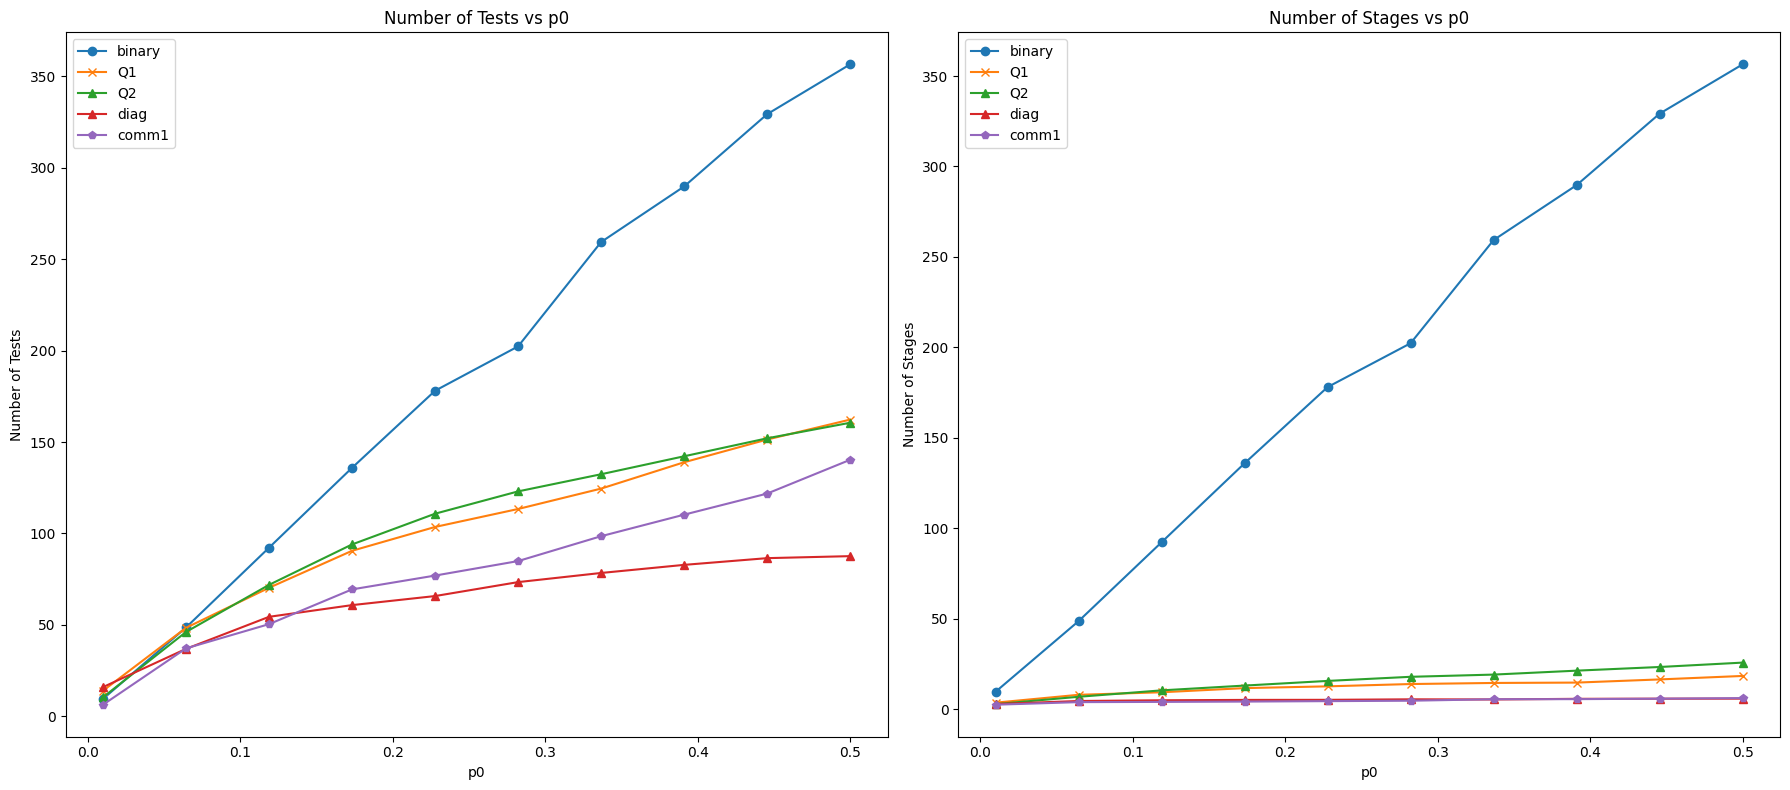

In [7]:
N = 100
M = 10
q0 = 0.1
q1 = 0.01
p1 = 0.05
time_steps = 2
num_sims = 40
method = 'binary'
method2 = 'Q1'
method3 = 'Q2'
method4 = 'diag'

method5 = 'comm1'
method6 = 'comm2'

p_values = np.linspace(0.01, 0.5, 10)
plot_results(N, M, q0, q1, p1, time_steps, num_sims, method, method2,method3, method4, method5, method6, p_values)

Consider $N=256$, and $M=16,64,128$. Use SBM with $q0=1$ and $q1=0$ to generate contact networks (disconnected cliques). For the infection model, use $p_0 = 0.001$ and $p_1 = [0.01:1]$ and the number of infection steps as $2$ . 
Average over 100 SBM network realizations.

<div class="alert alert-warning">
<b>Task 2 </b> 
Provide plots for i.i.d. infection probability that ranges from $p=0.01$ to $p=0.3$, and $N=256$.
Compare the performance of tests $T_1$, $T_2$, and binary output tests. Do you observe a consistent performance? Can you explain your results? 
    
</div>

<div class="alert alert-warning">
<b>Task 3 </b>  
Provide plots that compare the performance of various testing techniques on the Stochastic Block Model (SBM) using the settings outlined in Table 2 and on real data. You may explore additional settings that could reveal significant insights for your custom algorithms. Interpret and explain the results you obtain. Your plots should include: (i) a plot demonstrating how the performance of different testing schemes varies as the family sizes change, (ii)a plot demonstrating how the performance of different testing schemes varies as the infection probability changes and (iii) a plot illustrating how infections concentrate within families in the SBM.
</div>

| N | M | q0, q1 | p0 | p1 |time steps  |
|---|---|--------|----|----|------------|
|256| 16| (0.9,0.1)  |0.001|[0.05:1]|2|
|   | 64|(1, 0)  | 0.001| [0.05:1]|2     |
|   | 64|(0.9, 0.1)  | 0.001| [0.05:1]|2     |
|   | 64|(0.5, 0.2)  | 0.001| [0.05:1]|2     |
|   | 128 |(0.9, 0.1)  | 0.001| [0.05:1]|2     |


In [ ]:
N = 256
M = 16
q0 = 0.5
q1 = 0.3

time_steps = 2
method = 'your method'

In [ ]:
# the simulation 
t = 10
fraction_infected_ppl = np.zeros(t)
fraction_infected_clc = np.zeros(t)
fraction_infected_family = np.zeros(t)
num_tests = np.zeros((t,3))
num_stages = np.zeros((t,3))
p0 = 0.001
num_sims = 100
for j in range(1,t+1):
    p1 = j/t
    fraction_ppl[j-1], fraction_clc[j-1], fraction_plp_in_clc[j-1], num_tests[j-1], num_stages[j-1]= iter(N,M,q0,q1,p0,p1,time_steps,num_sims,method,dataset='sbm')  
       

In [ ]:
p1s = np.arange(1,t+1)/t

In [ ]:
plt.figure(figsize=(6, 4), dpi=300)
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})
markers = ['.', ',','o','v','^','<','>']
   
plt.plot(p1s,num_tests[:,i],label='binary splitting',marker=markers[i])
#########your code here###########

plt.xlabel('Transmission probability: p1',fontsize=14)
plt.ylabel('Expected number of tests',fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(frameon=False, loc='best')
plt.tight_layout()
fig_name = 'RES_N'+str(N)+'_M'+str(M)+'SIM'+str(num_sims)+'step_'+str(time_steps)+'q0'+str(q0)+'q1'+str(q1)+'p0'+str(p0)+method+'GT.pdf'
plt.savefig(fig_name, format='pdf', bbox_inches='tight')

In [ ]:
plt.plot(p1s,fraction_ppl,label='Fraction of infected people')
plt.plot(p1s,fraction_clc,label='Fraction of infected communities')
plt.plot(p1s,fraction_plp_in_clc,label='Fraction of infected people in each community')
plt.xlabel('Transmission probability: p1',fontsize=14)
plt.ylabel('Infection stats',fontsize=14)
plt.legend()
plt.savefig('RES_N'+str(N)+'_M'+str(M)+'SIM'+str(num_sims)+'step_'+str(time_steps)+'q0'+str(q0)+'q1'+str(q1)+'p0'+str(p0)+method+'stats.pdf')